In [1]:
import pandas as pd
from numpy import random

SEED = 123
random.seed(SEED)
df = pd.read_csv('exames.csv')
df.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [2]:
valores_exames = df.drop(columns=['id', 'diagnostico'])
diagnostico = df['diagnostico']

valores_exames_v1 = valores_exames.drop(columns=["exame_33"])

#etapa 1 - segregar dados entre treino e teste
from sklearn.model_selection import train_test_split

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, test_size = 0.3)

In [3]:
#etapa 2 - criar modelo de classificacao
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)
score = classificador.score(teste_x, teste_y)

print("Resultado da classificação %.2f%%" %((score)*100))

Resultado da classificação 98.25%


In [4]:
from sklearn.dummy import DummyClassifier

SEED = 123
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy="most_frequent")
classificador_bobo.fit(treino_x, treino_y)
score = classificador_bobo.score(teste_x, teste_y)

print("Resultado da classificação_bobo %.2f%%" %((score)*100))

Resultado da classificação_bobo 60.23%


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

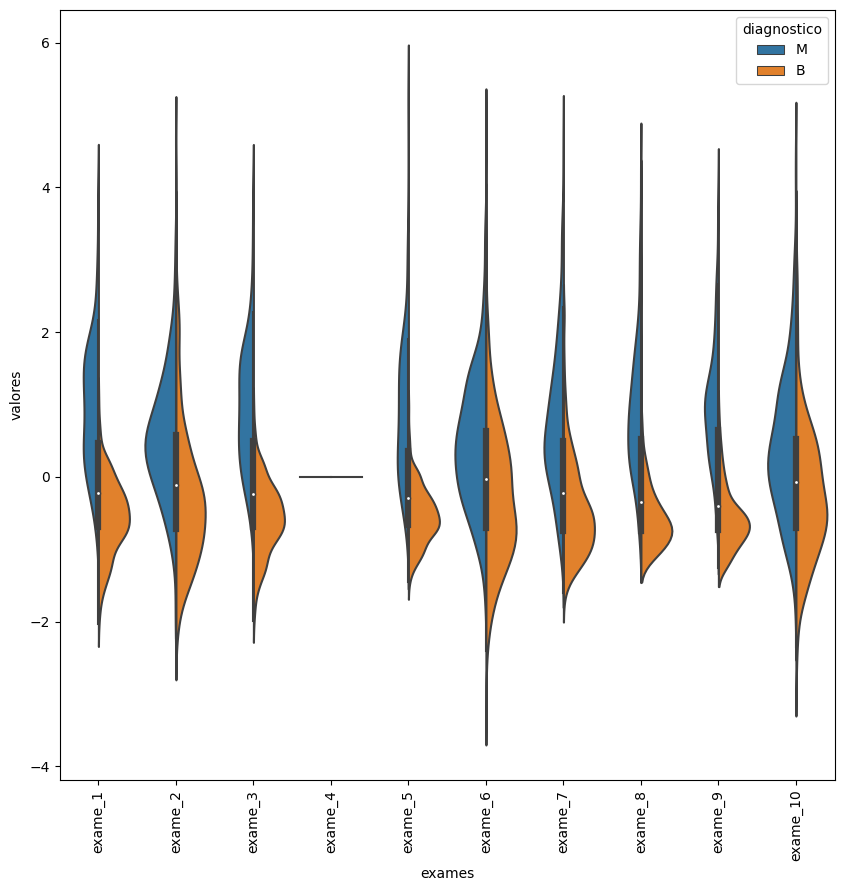

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data=valores_exames_v2, columns=valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

plt.figure(figsize=(10,10))

sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot, split = True)
plt.xticks(rotation = 90)


In [6]:
def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,inicio:fim]], axis=1)
    dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

    plt.figure(figsize=(10,10))

    sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot, split = True)
    plt.xticks(rotation = 90)

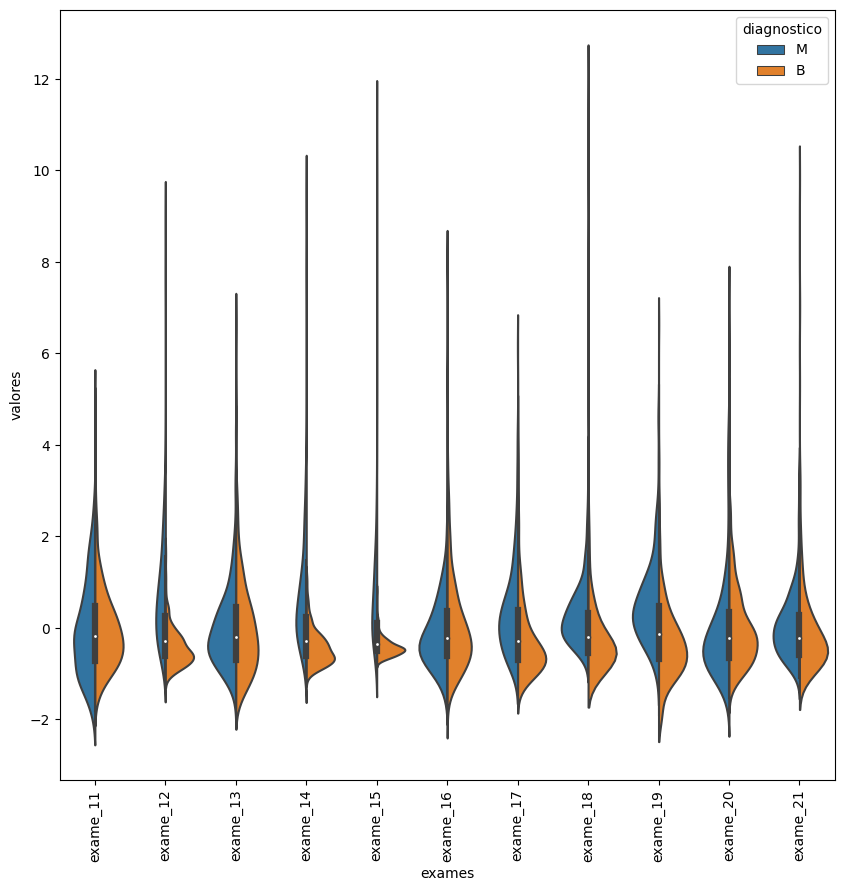

In [7]:
grafico_violino(valores_exames_v2, 10, 21)

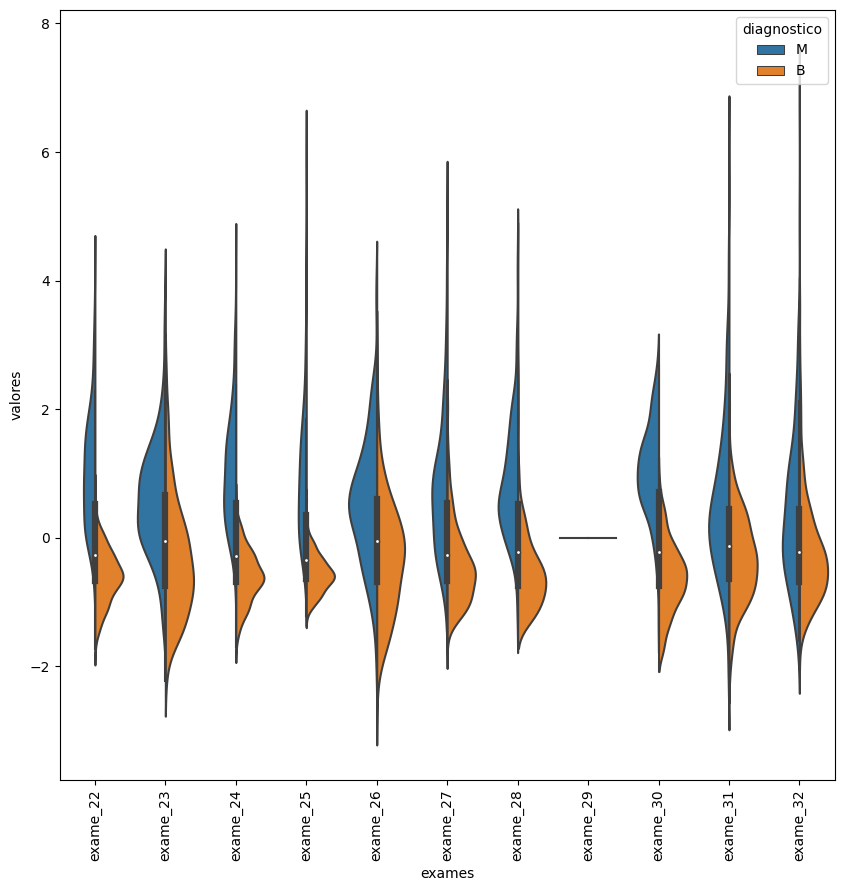

In [8]:
grafico_violino(valores_exames_v2, 21, 32)

In [9]:
valores_exames_v3 = valores_exames_v2.drop(columns=["exame_4", "exame_29"])

In [10]:
def classificar(valores):
    SEED = 1234
    random.seed(SEED)
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size = 0.3)
    classificador = RandomForestClassifier(n_estimators=100)
    classificador.fit(treino_x, treino_y)
    score = classificador.score(teste_x, teste_y)
    print("Resultado da classificação %.2f%%" %((score)*100))

In [11]:
classificar(valores_exames_v3)

Resultado da classificação 92.98%


<AxesSubplot: >

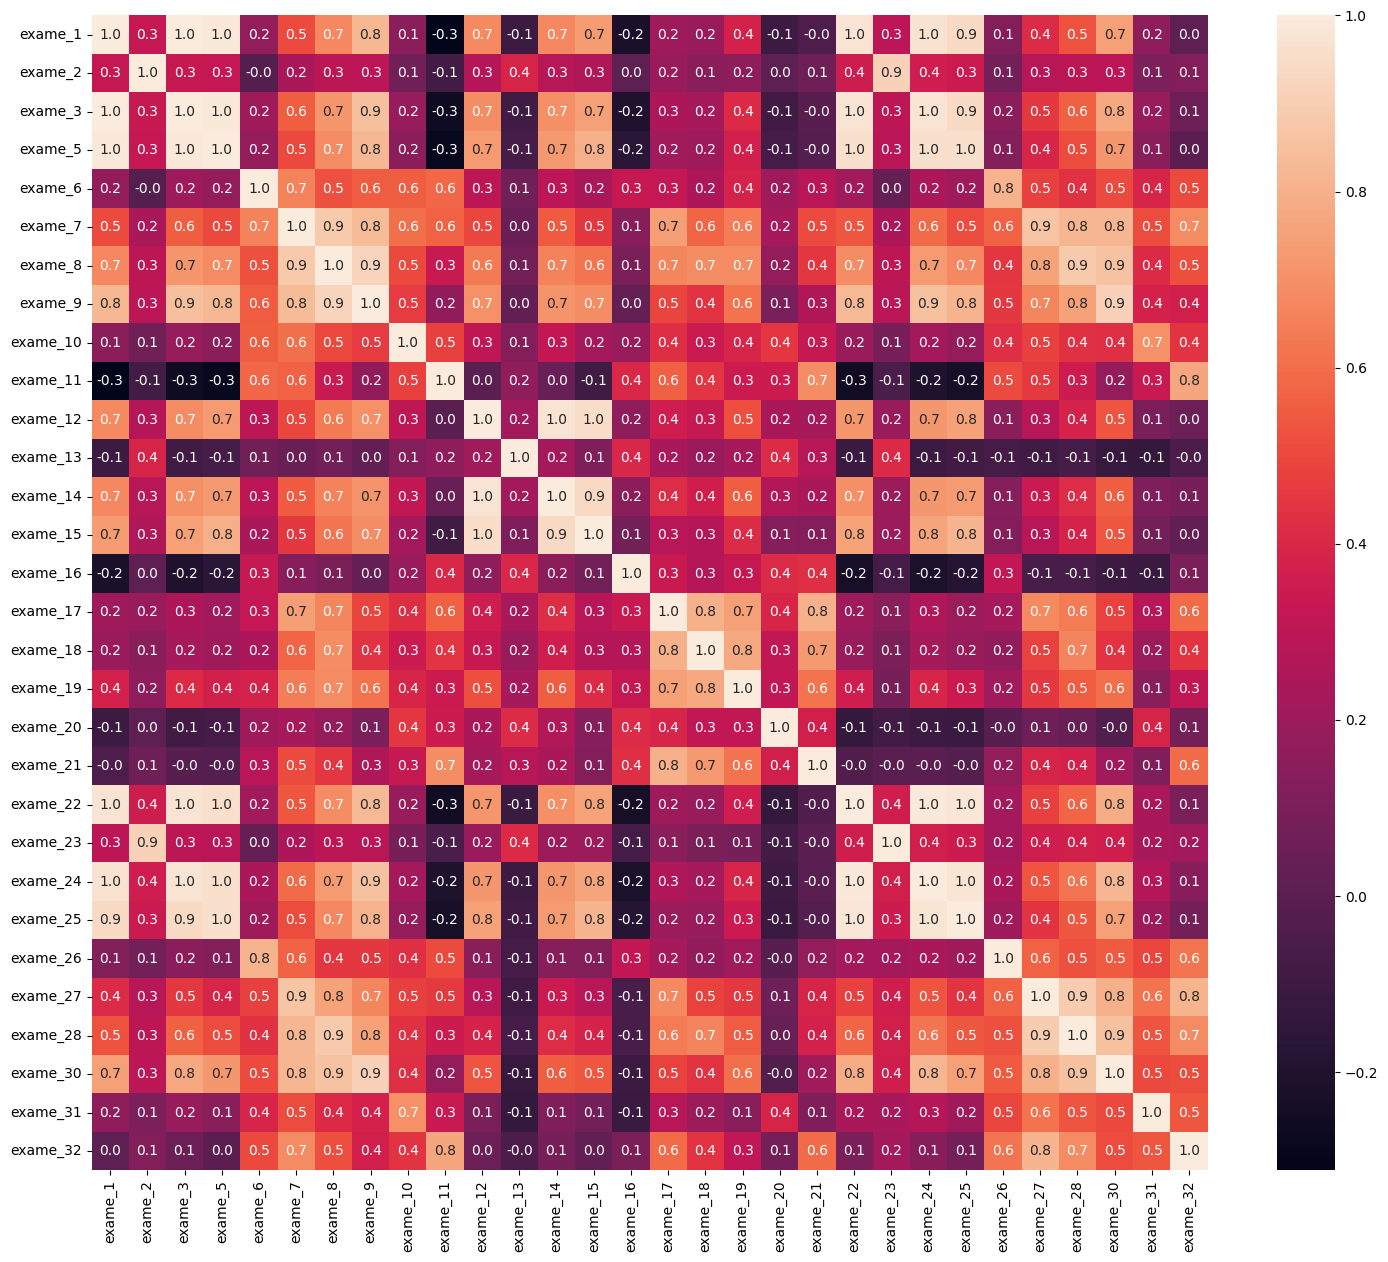

In [12]:
matriz_corr = valores_exames_v3.corr()
plt.figure(figsize=(18,15))
sns.heatmap(matriz_corr, annot=True, fmt = ".1f")

In [13]:
matriz_corr_v1 = matriz_corr[matriz_corr>0.99]

In [14]:
matriz_corr_v2 = matriz_corr_v1.sum()

In [15]:
variaveis_corr = matriz_corr_v2[matriz_corr_v2>1]
variaveis_corr


exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [16]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_corr.keys())

In [17]:
classificar(valores_exames_v4)

Resultado da classificação 91.81%


In [18]:
valores_exames_v5 = valores_exames_v3.drop(columns = ["exame_3", "exame_24"])

In [19]:
classificar(valores_exames_v5)

Resultado da classificação 92.98%


In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k=5)

In [22]:
valores_exames_v6 = valores_exames_v1.drop(columns=["exame_4", "exame_29", "exame_3", "exame_24"])

In [23]:
SEED = 1234
random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [24]:
treino_kbest.shape

(398, 5)

In [25]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
score = classificador.score(teste_kbest, teste_y)
print("Resultado da classificação %.2f%%" %((score)*100))

Resultado da classificação 92.40%


In [26]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))

[Text(0.5, 20.049999999999997, 'Predição'), Text(47.25, 0.5, 'Real')]

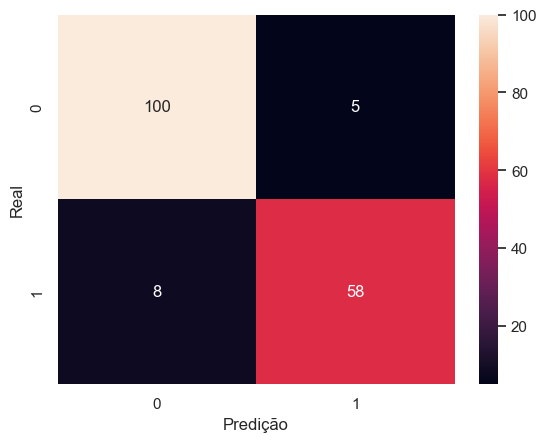

In [27]:
sns.set()
sns.heatmap(matriz_confusao, annot=True, fmt="d"). set(xlabel = "Predição", ylabel = "Real")

Resultado da classificação 87.13%


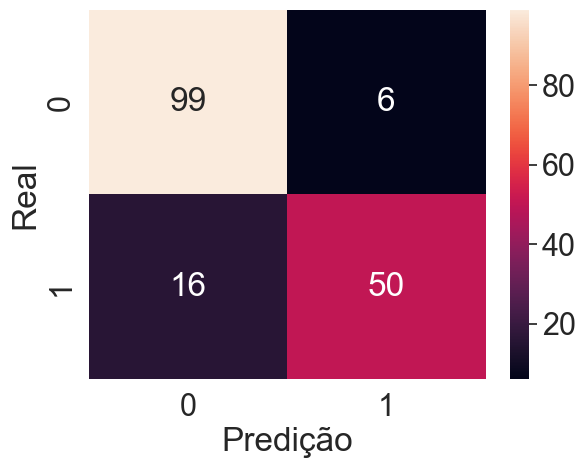

In [35]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfe = RFE(estimator=classificador, n_features_to_select=2, step = 1)
selecionador_rfe.fit(treino_x, treino_y)

treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot=True, fmt="d"). set(xlabel = "Predição", ylabel = "Real")

score = classificador.score(teste_rfe, teste_y)
print("Resultado da classificação %.2f%%" %((score)*100))


Resultado da classificação 92.98%


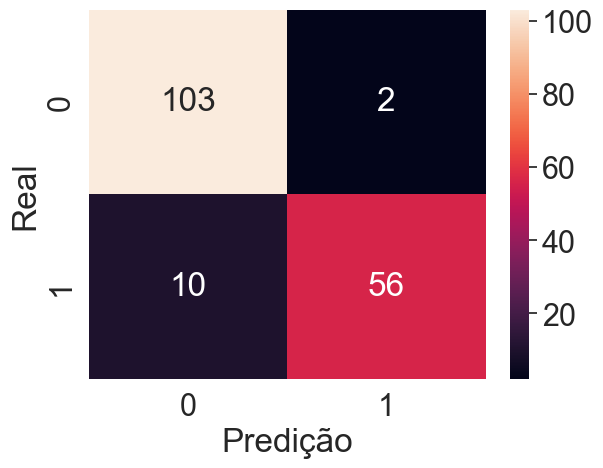

In [29]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfecv = RFECV(estimator=classificador, cv=5, step = 1, scoring="accuracy")
selecionador_rfecv.fit(treino_x, treino_y)

treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot=True, fmt="d"). set(xlabel = "Predição", ylabel = "Real")

score = classificador.score(teste_rfecv, teste_y)
print("Resultado da classificação %.2f%%" %((score)*100))

In [31]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

AttributeError: 'RFECV' object has no attribute 'grid_scores_'

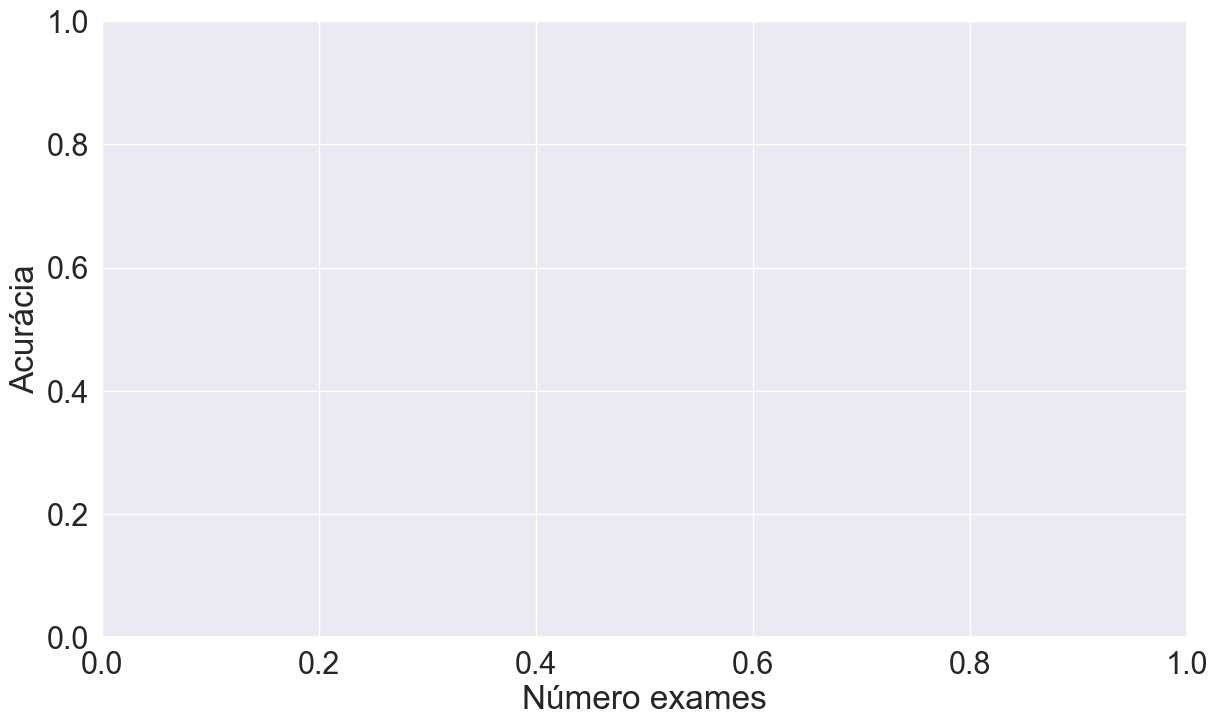

In [33]:
"""import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.xlabel("Número exames")
plt.ylabel("Acurácia")
plt.plot(range(1, len(selecionador_rfecv.grid_scores_) + 1), selecionador_rfecv.grid_scores_)
plt.show()"""

In [36]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)
valores_exames_v7.shape

(569, 2)

<AxesSubplot: >

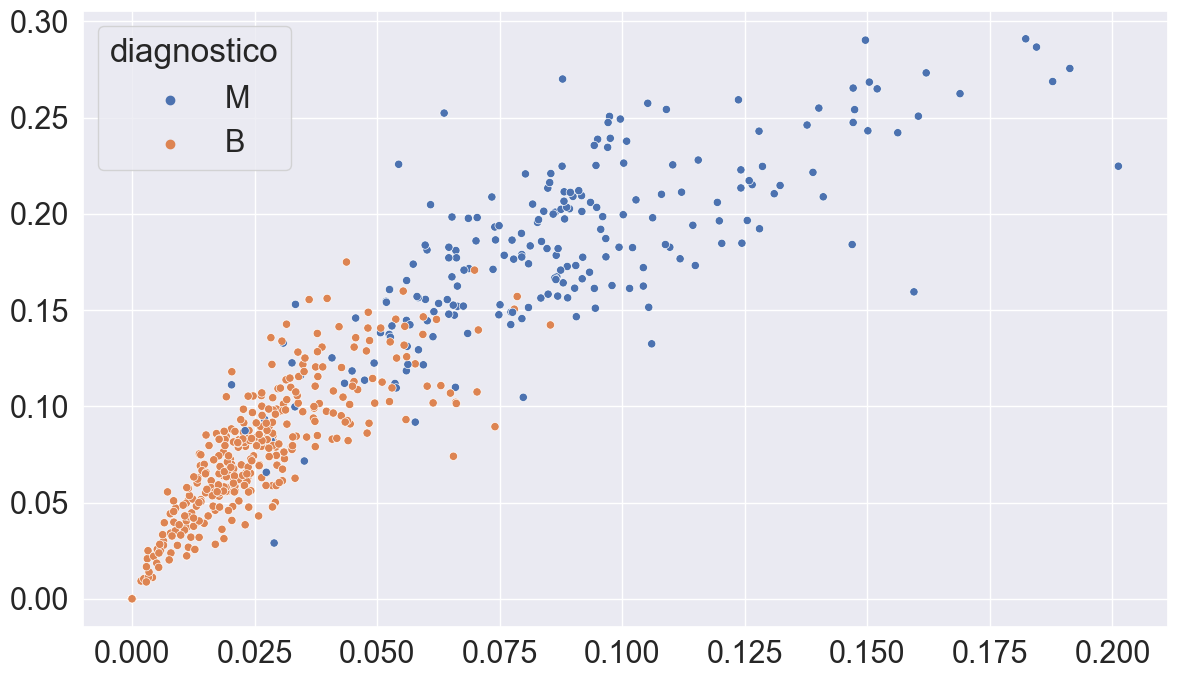

In [39]:
import seaborn as sns

plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v7[:,0], y=valores_exames_v7[:,1] , hue=diagnostico)

<AxesSubplot: >

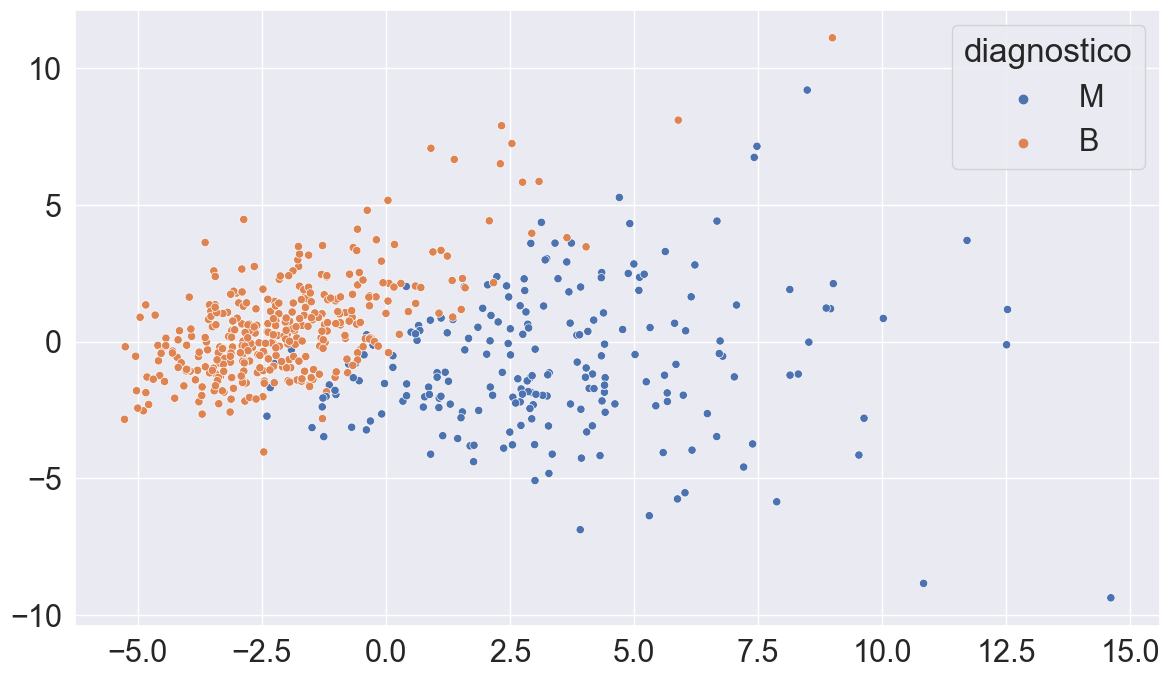

In [41]:
from sklearn.decomposition import PCA

pca =   PCA(n_components=2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v8[:,0], y=valores_exames_v8[:,1] , hue=diagnostico)

<AxesSubplot: >

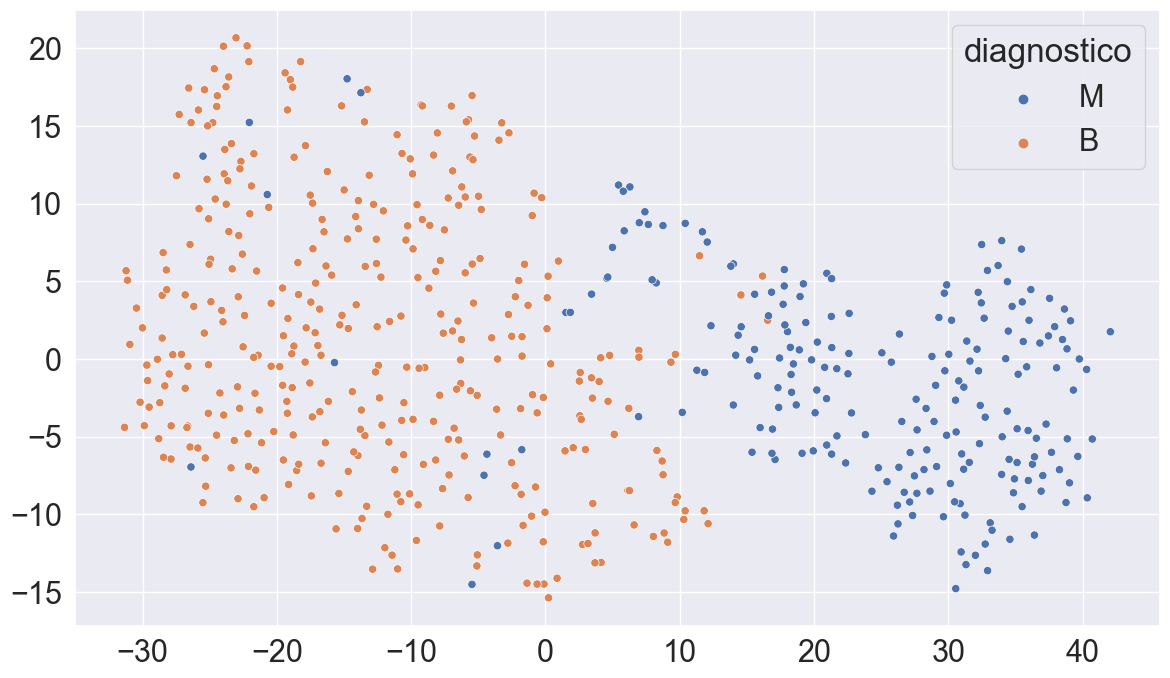

In [42]:
from sklearn.manifold import TSNE

tsne =   TSNE(n_components=2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v9[:,0], y=valores_exames_v9[:,1] , hue=diagnostico)